In [1]:
import numpy as np
from numba import njit
from scipy.linalg import svd, qr, inv, pinv
import matplotlib.pyplot as plt


In [47]:
import pymc3 as pm

def _model(theta, x):
    return theta[0] + theta[1] * x + theta[2] * x **2

In [54]:
theta = np.asarray([0.5, 25, -1])
N = 10

# np.random.seed(10)
x =  np.random.rand(N) * 20
x = np.sort(x)
y = _model(theta, x)

# x = np.random.normal(x, 5)
y = np.random.normal(y, 5)

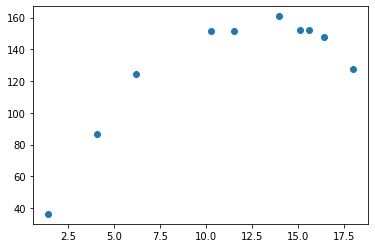

In [55]:
plt.plot(x, y, 'o')

In [65]:
with pm.Model() as model:
    
    # Define priors
    sigma = pm.HalfNormal("sigma", sd=2)
    
#     theta = Normal('beta', mu=0, sd=10, shape=2)
    
    a0 = pm.Normal('a0', mu=0.5, sd=10)
    a1 = pm.Normal('a1', mu=25, sd=10)
    a2 = pm.Normal('a2', mu=-1, sd=10)
    a3 = pm.Normal('a3', mu=1, sd=10)

    
#     theta  = pm.Normal('theta', mu=np.array([0.5, 2]), sigma=np.array([10, 10]))
    
    # Define likelihood
    likelihood = pm.Normal('y', mu=a0 + a1 * x + a2*x**2 + a3*x**3, sd=sigma, observed=y)

    # Inference!
    trace = pm.sample(10000, cores=6) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [a3, a2, a1, a0, sigma]
Sampling 6 chains, 660 divergences: 100%|█████████████████████████████████████| 63000/63000 [15:35<00:00, 67.34draws/s]
There were 196 divergences after tuning. Increase `target_accept` or reparameterize.
There were 407 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7200472983824687, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9999754136189628, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` 

In [10]:
# # res = plt.hist(sigma.random(size=50000), bins=500, histtype="stepfilled")
# with pm.Model() as model:
#     h = pm.HalfCauchy('h', beta=50)
# res = plt.hist(h.random(size=5000), bins=500, histtype="stepfilled")     
# plt.xlim(0, 500)
# # res = plt.hist(intercept.random(size=50000), bins=500, histtype="stepfilled")               

c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D8B90C948>,
      dtype=object)

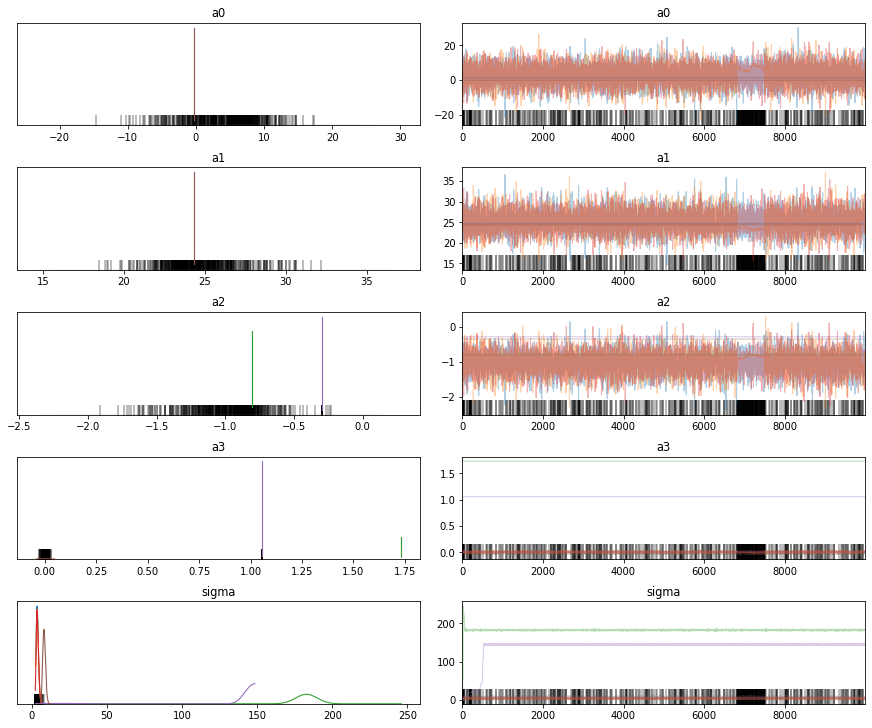

In [66]:
pm.traceplot(trace[:])

In [60]:
trace["a0"].shape

(60000,)

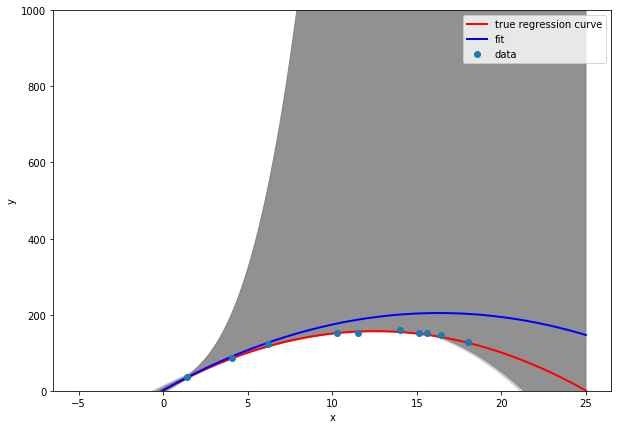

In [72]:
plt.figure(figsize=(10, 7))


# slope_samples = trace[100:]['slope']
# int_samples = trace[100:]['intercept']


a0_samples = trace[100:]['a0']
a1_samples = trace[100:]['a1']
a2_samples = trace[100:]['a2']
a3_samples = trace[100:]['a3']


_x = np.linspace(-5, 25, 500)

curves = a0_samples[:, None] + a1_samples[:, None] * _x[None, :] + a2_samples[:, None] * _x[None, :] ** 2  + a3_samples[:, None] * _x[None, :] ** 3

# lines = slope_samples[:, None] * _x[None, :] + int_samples[:, None]

# plt.plot(x, lines[::100].T, lw=0.1, color='gray')

true_y = _model(theta, _x)
plt.plot(_x, true_y, label='true regression curve', lw=2., c='r')

q_1, q_5, q_95, q_99 = np.quantile(curves, [0.01, 0.05, 0.95, 0.99], axis=0)


# slope_avrg = slope_samples.mean()
# int_avrg = int_samples.mean()
# line_avrg = slope_avrg  * _x + int_avrg

plt.fill_between(_x, q_5, q_95, color=(0.5, 0.5, 0.5, 0.8))
plt.fill_between(_x, q_1, q_99, color=(0.5, 0.5, 0.5, 0.3))

# plt.fill_between(_x, true_y + 2 * stds, true_y - 2 * stds, color=(0.5, 0.5, 0.5, 0.5))
# plt.fill_between(_x, true_y + 3 * stds, true_y - 3 * stds, color=(0.5, 0.5, 0.5, 0.3))

plt.plot(_x, _model([a0_samples.mean(), a1_samples.mean(), a2_samples.mean(), a3_samples.mean()], _x), label='fit', lw=2., c='b')

plt.plot(x, y, 'o', label='data')



# plt.title('Posterior predictive regression lines')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 1000)


plt.show()


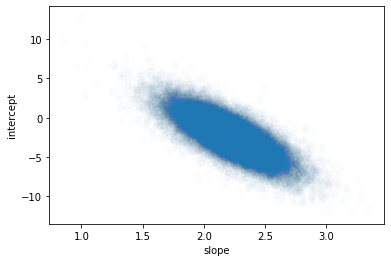

In [9]:
plt.plot(slope_samples[::1], int_samples[::1], 'o', alpha=0.01)
plt.xlabel('slope')
plt.ylabel('intercept')
plt.show()

In [86]:
samples = poisson_param.random(size=500000)

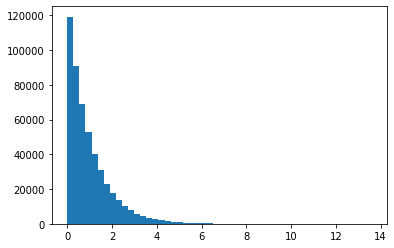

In [90]:
res = plt.hist(samples, bins=50, histtype="stepfilled")

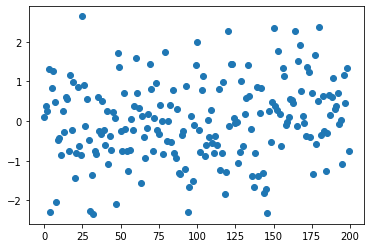

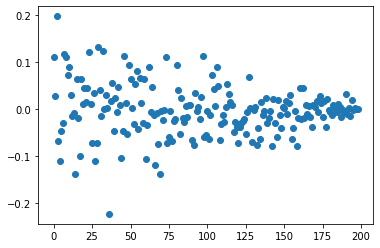

In [37]:
x = np.random.normal(0, 1, size=200)

corr =np.correlate(x, x, mode='full')
corr /= corr.max()
corr = corr[corr.size // 2 + 1:]

plt.plot(x, 'o')
plt.show()
plt.plot(corr, 'o')